Training MSE:  7.15251895354952
Validation MSE:  459.2411569614929


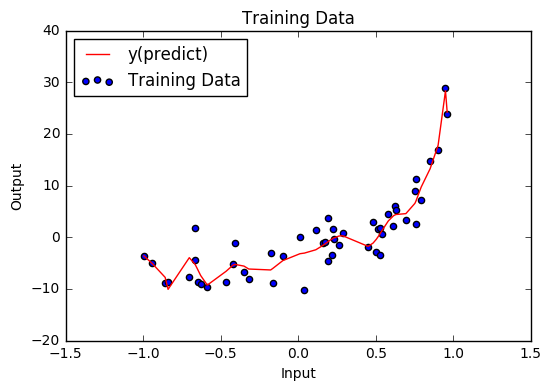

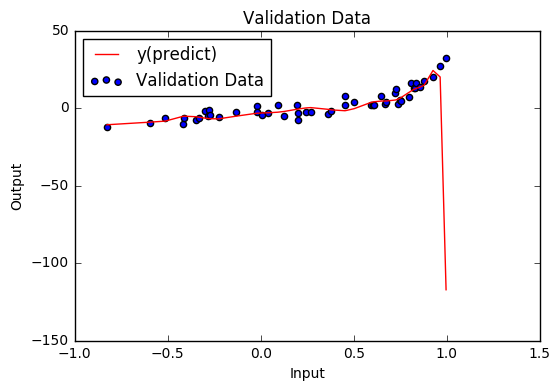

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read data from DataSets
trainData = pd.read_csv("data/Dataset_1_train.csv", header=None)
validData = pd.read_csv("data/Dataset_1_valid.csv", header=None)
testData = pd.read_csv("data/Dataset_1_test.csv", header=None)
# Sort data
trainData.sort_values(by=[0], inplace=True)
validData.sort_values(by=[0], inplace=True)
testData.sort_values(by=[0], inplace=True)
# Drop end column (not useful to us)
trainData.drop([2], axis=1, inplace=True)
validData.drop([2], axis=1, inplace=True)
testData.drop([2], axis=1, inplace=True)
# 20-degree polynomial
M = 20;

def getPolyMatrix(data, deg):
    input_data = data[0]
    data.drop([1], axis=1, inplace=True)
    
    # Build 50x21 matrix
    for i in range(deg+1):
        data[i] = np.power(input_data, i)
    return data

def getWeightedMatrix(X, Y, lambdaVal, deg):
    # X = polynomial matrix
    # Y = output matrix
    # w = weighted matrix = [(X^(T)X+I(lambdaVal))^(-1)] (X^(T)Y)
    XtX_IL_inv = np.linalg.pinv(np.matmul(X.T, X)+(np.identity(deg+1)*lambdaVal))
    XtY = np.matmul(X.T, Y)
    w = np.matmul(XtX_IL_inv, XtY)
    return w

def getMSE(X, Y, w):
    # MSE(w) = (1/N)sum(from n=1 to N) {Xn^(T)w - Y}^2
    temp = np.power(np.subtract(np.matmul(X, w), Y), 2)
    MSE = np.sum(temp)/temp.size
    return MSE

# Get output matrices, Y
trainOutMatrix = trainData[1]
validOutMatrix = validData[1]
testOutMatrix = testData[1]
# Compute polynomial matrices, X
trainPolyMatrix = getPolyMatrix(trainData, M)
validPolyMatrix = getPolyMatrix(validData, M)
testPolyMatrix = getPolyMatrix(testData, M)


###1(a) Report the training and validation MSE (Mean-Square Error). Do not use any regularization.###

# Lambda = 0 since no regularization
w = getWeightedMatrix(trainPolyMatrix, trainOutMatrix, 0, M)
trainMSE = getMSE(trainPolyMatrix, trainOutMatrix, w)
validMSE = getMSE(validPolyMatrix, validOutMatrix, w)

print("Training MSE: ", trainMSE)
print("Validation MSE: ", validMSE)


###1(b) Visualize the fit.###

#Plot Training Data
plt.title("Training Data")
plt.xlabel("Input")
plt.ylabel("Output")
trainOutput = np.matmul(trainPolyMatrix, w)
plt.plot(trainPolyMatrix[1], trainOutput, 'r', label="y(predict)")
plt.scatter(trainPolyMatrix[1], trainOutMatrix, label="Training Data")
plt.legend(loc='best')
plt.show()
#Plot Validation Data
plt.title("Validation Data")
plt.xlabel("Input")
plt.ylabel("Output")
validOutput = np.matmul(validPolyMatrix, w)
plt.plot(validPolyMatrix[1], validOutput, 'r', label="y(predict)")
plt.scatter(validPolyMatrix[1], validOutMatrix, label="Validation Data")
plt.legend(loc='best')
plt.show()

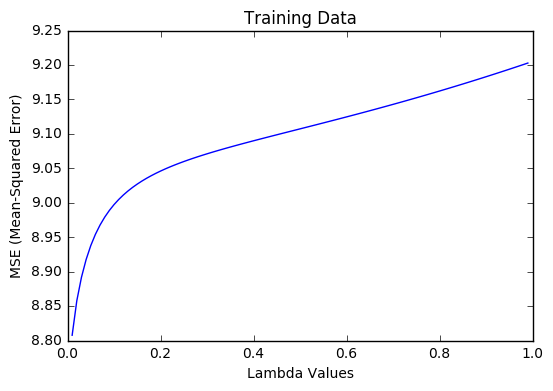

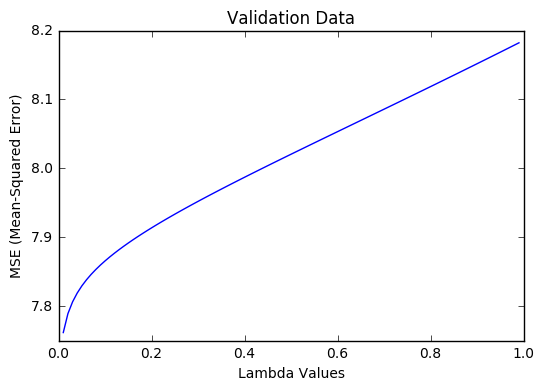

Best training value of λ:  0.01
Best training MSE:  8.807610880442795 

Best validation value of λ:  0.01
Best validation MSE:  7.7615051714404375 

MSE of test data:  10.822349630572226


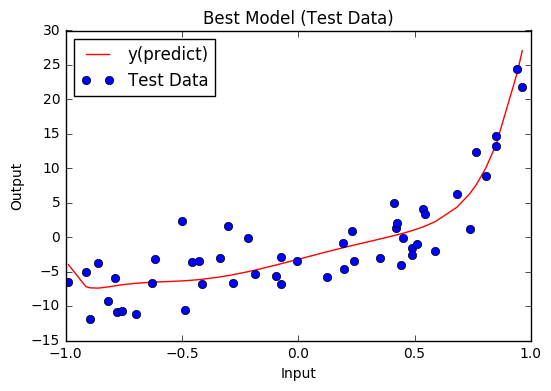

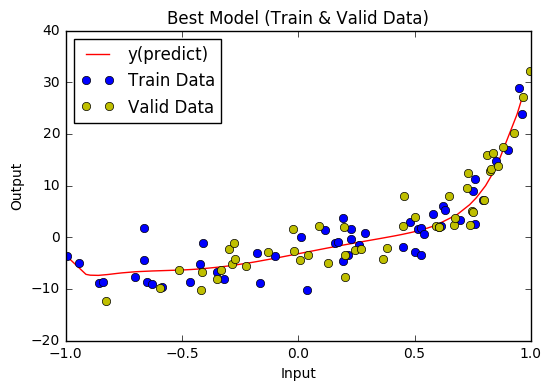

In [8]:
###2(a) For different values of λ, plot the training MSE and the validation MSE.###

# Store all training λ values and the resulting MSE
trainLambdaValues = []
trainMSEValues = []
# Init values
trainLambdaOptimal = 0.0
trainMSEOptimal = 99999
trainLambdaVal = 0.01

for i in range(0, 99):
    trainLambdaValues.append(trainLambdaVal)
    trainW_reg = getWeightedMatrix(trainPolyMatrix, trainOutMatrix, trainLambdaVal, M)
    trainMSE_reg = getMSE(trainPolyMatrix, trainOutMatrix, trainW_reg)
    trainMSEValues.append(trainMSE_reg)
    # Get optimal lambda value
    if (trainMSE_reg < trainMSEOptimal):
        trainMSEOptimal = trainMSE_reg
        trainLambdaOptimal = trainLambdaVal
    # Run 100 times from 0.01 to 0.99
    trainLambdaVal += 0.01
    
    
# Store all validation λ values and the resulting MSE
validLambdaValues = []
validMSEValues = []
# Init values
validLambdaOptimal = 0.0
validMSEOptimal = 99999
validLambdaVal = 0.01

for j in range(0, 99):
    validLambdaValues.append(validLambdaVal)
    validW_reg = getWeightedMatrix(validPolyMatrix, validOutMatrix, validLambdaVal, M)
    validMSE_reg = getMSE(validPolyMatrix, validOutMatrix, validW_reg)
    validMSEValues.append(validMSE_reg)
    # Get optimal lambda value
    if (validMSE_reg < validMSEOptimal):
        validMSEOptimal = validMSE_reg
        validLambdaOptimal = validLambdaVal
    # Run 100 times from 0.01 to 0.99
    validLambdaVal += 0.01
    
    
#Plot Training Data
plt.title("Training Data")
plt.xlabel("Lambda Values")
plt.ylabel("MSE (Mean-Squared Error)")
plt.plot(trainLambdaValues, trainMSEValues)
plt.show()
#Plot Validation Data
plt.title("Validation Data")
plt.xlabel("Lambda Values")
plt.ylabel("MSE (Mean-Squared Error)")
plt.plot(validLambdaValues, validMSEValues)
plt.show()


###2(b) Pick the best value of λ and report the test performance for the corresponding model.###

print("Best training value of λ: ", trainLambdaOptimal)
print("Best training MSE: ", trainMSEOptimal, "\n")
print("Best validation value of λ: ", validLambdaOptimal)
print("Best validation MSE: ", validMSEOptimal, "\n")


###2(c) Also visualize the fit for the chosen model.###

w_optimal = getWeightedMatrix(trainPolyMatrix, trainOutMatrix, trainLambdaOptimal, M)
MSETest = getMSE(testPolyMatrix, testOutMatrix, w_optimal)
print("MSE of test data: ", MSETest)

#Plot chosen model using test data
plt.title("Best Model (Test Data)")
plt.xlabel("Input")
plt.ylabel("Output")
testOutput = np.matmul(testPolyMatrix, w_optimal)
plt.plot(testPolyMatrix[1], testOutput, "r", label="y(predict)")
plt.plot(testPolyMatrix[1], testOutMatrix, "bo", label="Test Data")
plt.legend(loc="best")
plt.show()
#Plot chosen model using train & valid data
plt.title("Best Model (Train & Valid Data)")
plt.xlabel("Input")
plt.ylabel("Output")
testOutput = np.matmul(testPolyMatrix, w_optimal)
plt.plot(testPolyMatrix[1], testOutput, "r", label="y(predict)")
plt.plot(trainPolyMatrix[1], trainOutMatrix, "bo", label="Train Data")
plt.plot(validPolyMatrix[1], validOutMatrix, "yo", label="Valid Data")
plt.legend(loc="best")
plt.show()